# Tarea 3

Decorador para medir runtime

In [65]:
import time
from time import sleep

lista = []
lista1 = []
lista2 = []

#funcion decoradora para medir el runtime
def DecoratorRunTime(func):
    # funcion para mostrar el runtime de la funcion
    def wrap_func(*args, **kwargs):
        t1 = time.time_ns()
        result = func(*args, **kwargs)
        t2 = time.time_ns()
        runtime = (float(t2-1*10**-9)-float(t1-1*10**-9))
        lista.append(runtime) #los valores se guardan en lista
        return result
    return wrap_func

## Pregunta 1

**Merge two sorted lists**

1. Assume you have two sorted linked lists. Use recursion to merge these lists and return a new sorted list.
For example:
```
L1 = 1 -> 3 -> 5 -> 7 -> null
L2 = 2 -> 4 -> 6 -> null
```
Output
```
L4 = 1 -> 2 -> 3-> 4 -> 5 -> 6 -> 7 -> null
```
2. Calculate complexity

1. Se crean 2 linkedList y se imprimen para  ver sus contenidos

In [16]:
class Node:
    def __init__(self,val):
        self.val = val
        self.next_node = None
        
class Singly_linked_list:
    def __init__(self):
        self.head = None
        
    def traverseList(self):
        mov = self.head
        while mov:
            print(mov.val)
            mov = mov.next_node
        print("\n")
        
    def append(self,data):
        new_node = Node(data)
        if self.head == None:
            self.head = new_node
            return
        last = self.head
        while last.next_node:
            last = last.next_node
        last.next_node = new_node
        
L1 = Singly_linked_list()
L1.append(1)
L1.append(3)
L1.append(5)
L1.append(7)
L1.traverseList()
L2 = Singly_linked_list()
L2.append(2)
L2.append(4)
L2.append(6)
L2.traverseList()


1
3
5
7


2
4
6




Funcion para unir las dos linkedList

In [18]:
def mergeRecursion(List1,List2):
    nodo = None
    if List1 == None:
        return List2
    if List2 == None:
        return List1
    if List1.val <= List2.val:
        nodo = List1
        nodo.next_node = mergeRecursion(List1.next_node,List2)
    else:
        nodo = List2
        nodo.next_node = mergeRecursion(List1,List2.next_node)
    return nodo

In [19]:
L3 = Singly_linked_list()
L3.head = mergeRecursion(L1.head, L2.head)

print("LinkedList merged")
L3.traverseList()

LinkedList merged
1
2
3
4
5
6
7




2. Complejidad


```
def mergeRecursion(List1,List2):
    temp = None
    if List1 == None:
        return List2
    if List2 == None:
        return List1
    if List1.val <= List2.val:
        temp = List1
        temp.next_node = mergeRecursion(List1.next_node,List2)
    else:
        temp = List2
        temp.next_node = mergeRecursion(List1,List2.next_node)
    return temp
```
Complejidad:
El runtime de la funcion mergeRecursion depende de la longitud de las linkedList L1 y L2, por lo que la complejidad sera O(n+m), donde m sera la complejidad de L1 y n la de L2 \
El gasto en memoria sera igual, ya que se crea una linked list donde cada nodo es igual a un nodo de L1 o L2. O(n+m)

## Pregunta 2

**Implement quick sort**

1. Use the divide and conquer technique to implement the quick sort algorithm studied in class.
2. Use a couple of parragraphs to explain the steps of divide and conquer:
    * how/where do you divide?
    * where/what do you conquer?
    * how/what do you combine?
3. Analyze complexity

1. Lo primero sera crear un arreglo con 1000 valores aleatorios de 1 a 100

In [19]:
import random
Array = [ ]
for i in range (1000):
    Array.append(random.randint(1, 100))
print("\t==============\n\tArray inicial\n\t==============\n\n",Array,"\n")

	Array inicial

 [34, 66, 75, 67, 6, 41, 58, 92, 47, 9, 97, 60, 53, 75, 90, 51, 11, 20, 34, 43, 41, 20, 91, 45, 67, 40, 54, 96, 27, 39, 20, 33, 87, 4, 92, 74, 56, 52, 31, 13, 4, 86, 32, 57, 4, 77, 75, 5, 5, 19, 41, 16, 51, 76, 55, 49, 9, 64, 70, 3, 75, 28, 83, 33, 92, 18, 90, 63, 16, 4, 70, 83, 47, 34, 52, 37, 47, 1, 39, 17, 19, 30, 80, 1, 54, 93, 45, 72, 51, 8, 46, 55, 11, 25, 9, 58, 45, 71, 63, 87, 95, 44, 5, 31, 34, 89, 45, 54, 47, 65, 32, 25, 79, 2, 44, 6, 92, 35, 15, 86, 78, 26, 19, 17, 31, 64, 68, 77, 83, 54, 30, 80, 2, 66, 56, 42, 87, 46, 51, 82, 75, 53, 82, 5, 71, 97, 83, 78, 96, 45, 56, 100, 76, 57, 34, 31, 39, 14, 69, 17, 63, 34, 68, 93, 4, 80, 59, 25, 59, 38, 7, 17, 69, 8, 1, 90, 55, 56, 15, 89, 32, 50, 64, 31, 7, 17, 72, 1, 64, 85, 20, 1, 37, 93, 24, 50, 50, 1, 87, 84, 86, 91, 74, 78, 95, 94, 27, 38, 85, 71, 86, 10, 48, 16, 71, 5, 98, 44, 90, 18, 27, 88, 95, 22, 1, 42, 4, 15, 72, 91, 17, 68, 4, 6, 83, 45, 95, 39, 40, 6, 29, 46, 92, 76, 9, 35, 82, 77, 18, 85, 75, 66, 67, 94,

Se implementa el metodo quickSort

In [45]:
def quickSort(array):
    if len(array)<=1:
        return array
    pivot = array[len(array)-1]
    menor=[]
    mayor=[]
    for i in range(0,len(array)-1):
        if array[i]<=pivot:
            menor.append(array[i])
        else:
            mayor.append(array[i])

    return quickSort(menor) + [pivot] + quickSort(mayor)

Probar la funcione

In [21]:
print("\t==============\n\tArray ordenado\n\t==============\n",quickSort(Array))

	Array ordenado
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 22, 22, 22, 22, 22, 22, 22, 23, 23, 23, 23, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 26, 26, 26, 26, 26, 26, 26, 26, 26, 27, 27, 27, 27, 27, 27, 27, 28, 28, 28, 28, 28, 28, 

2. Pasos\
El programa implementado usa divide and conquer para resolver el problema de ordenamiento de arreglo.
* (Divide) En general, se divide en 3 partes. El pivot, un arreglo (menor[]) con numeros menores al pivot y un arreglo(mayor[]) con numeros mayores al pivot. Mediante recursion se hace esta misma division a los arreglos laterales con respecto al pivot (mayor y menor), separando en cada uno los arreglos y el pivot
* (Conquer) Como se menciono anteriormente, con recursion se divide cada lista en 3 partes, la primera y a la izquierda es el arreglo con los numeros menores, en el centro el pivot y a la derecha el arreglo con los numeros mayores, mediante recursion se repite este proceso para cada arreglo lo cual va colocando en orden los elementos
* (Combine) Ya teniendo los elementos ordenados, se concatenan los arreglos con el pivot en el return del arreglo para poder imprimir cuando se llama a la funcion quickSort

3. Complejidad

La complejidad del algoritmo depende de la ubicacion del pivot inicial. En el mejor de los casos el pivot inicial queda en el centro del arreglo dando una complejidad de $O(nlogn)$ (n por el lazo for, log n por la recursion). Encambio, en el peor de los casos, el pivot habria quedado en algun extremo del arreglo,dando asi una complejidad de $O(n^2)$

## Pregunta 3

**Compare quick sort and merge sort**

1. Generate 1000 random permutations of arrays of integers between 1 to 10000.
2. Execute merge sort and quick sort for each of the permutations
3. Calculate the execution time of these runs, and compare them using the statistics of the measured executed time.
4. Explain the differences. Which algorithm is better? When would you use each?

1. Generar arreglo de 1 a 10000

In [ ]:
Array = []
for i in range(1,10001):
    Array.append(i)
print(Array)

Se usa random.shuffle() 1000 veces

In [64]:
for j in range(1,1000):
    random.shuffle(Array)
    print(Array,"\n\n\n")

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[26, 28, 64, 2, 15, 68, 87, 43, 52, 63, 90, 92, 38, 44, 99, 72, 34, 32, 34, 20, 97, 50, 31, 30, 77, 60, 18, 66, 24, 83, 96, 81, 98, 10, 47, 94, 93, 75, 56, 40, 51, 44, 28, 48, 12, 81, 5, 54, 71, 62, 34, 8, 53, 99, 72, 22, 17, 62, 10, 75, 5, 47, 76, 57, 10, 59, 97, 6, 67, 90, 49, 63, 7, 91, 34, 83, 71, 42, 63, 50, 66, 92, 1, 77, 65, 1, 26, 52, 24, 9, 71, 73, 95, 70, 23, 33, 62, 43, 66, 2, 28, 19, 31, 79, 16, 31, 13, 14, 24, 85, 39, 64, 45, 99, 23, 18, 2, 64, 82, 84, 19, 95, 9, 83, 94, 21, 48, 56, 32, 56, 46, 48, 83, 84, 89, 75, 22, 87, 7, 89, 13, 99, 40, 97, 1, 58, 86, 75, 87, 93, 86, 52, 60, 4, 8, 67, 33, 39, 52, 31, 36, 59, 91, 62, 4, 17, 45, 33, 46, 92, 14, 73, 58, 25, 22, 89, 17, 37, 69, 4, 31, 74, 91, 72, 80, 41, 42, 84, 52, 35, 64, 17, 95, 66, 80, 51, 82, 58, 36, 84, 26, 90, 65, 3, 47, 80, 25, 7, 41, 88, 40, 23, 18, 70, 90, 54, 87, 16, 97, 24, 11, 94, 47, 34, 20, 4, 82, 6, 84, 25, 16, 59, 2, 76, 96, 63, 51, 97, 72, 89, 5, 6, 44, 62, 50, 87, 4, 77, 89, 100, 64, 74, 21, 78, 20, 40, 

2. Implementacion de mergeSort

In [46]:

def merge_sort(nums):
    if len(nums) <= 1:
        return nums
    pivot = int(len(nums) / 2)
    left = merge_sort(nums[0:pivot])
    right = merge_sort(nums[pivot:])
    return merge(left, right)


def merge(left, right):
    left_pointer = 0
    right_pointer = 0
    sorted_list = []
    while left_pointer < len(left) and right_pointer < len(right):
        if left[left_pointer] < right[right_pointer]:
            sorted_list.append(left[left_pointer])
            left_pointer += 1
        else:
            sorted_list.append(right[right_pointer])
            right_pointer += 1
    
    sorted_list.extend(left[left_pointer:])
    sorted_list.extend(right[right_pointer:])
    
    return sorted_list

3. execution time de merge sort y quick sort
debido a que se usa recursion, la misma funcion se llama multiples veces por lo que se tuvo que crear una funcion llamarMerge() y llamarQuick() para obtener el runtime de cada una.

In [66]:
@DecoratorRunTime
def llamarMerge(array):
    merge_sort(array)
    
@DecoratorRunTime    
def llamarQuick(array):
    quickSort(array)

for j in range(0,1000):
    random.shuffle(Array)
    llamarMerge(Array)
    llamarQuick(Array)
    
#agregar los datos de cada runtime a su respectiva lista
for a in range(0,len(lista)):
    if a%2 ==0:
        lista2.append(lista[a-1])
    else:
        lista1.append(lista[a-1])
print("RunTime quickSort: ",lista1)
print("RunTime mergeSort: ",lista2)
print("Runtime de quickSort obtenido",len(lista1))
print("Runtime de mergeSort obtenido",len(lista1))

RunTime quickSort:  [2006784.0, 1997824.0, 994560.0, 2011392.0, 1983744.0, 2001408.0, 1993984.0, 1999872.0, 1996032.0, 1999616.0, 1997056.0, 1999616.0, 2006272.0, 1999616.0, 1999872.0, 2019584.0, 1998848.0, 1999872.0, 1999104.0, 1991424.0, 2309632.0, 1999616.0, 1999872.0, 1999616.0, 1999872.0, 1999872.0, 2000128.0, 1999872.0, 999936.0, 2002176.0, 2011648.0, 1998848.0, 2000640.0, 1991936.0, 1999872.0, 1999872.0, 1999872.0, 1999872.0, 1992448.0, 999424.0, 1997312.0, 2003200.0, 2002688.0, 1998592.0, 1993984.0, 1992192.0, 2937088.0, 1996288.0, 2002944.0, 2003456.0, 2002176.0, 1995520.0, 2015744.0, 1008896.0, 1993728.0, 2933504.0, 1998848.0, 1999360.0, 2000896.0, 2000128.0, 1999360.0, 1999616.0, 2000896.0, 1999872.0, 2000640.0, 1001216.0, 1998336.0, 1999872.0, 2000128.0, 2000896.0, 1999872.0, 1998848.0, 2000640.0, 2001408.0, 1999872.0, 1999104.0, 2000896.0, 2000128.0, 1998848.0, 2000128.0, 2000128.0, 1999360.0, 2000896.0, 1999872.0, 1000192.0, 1999872.0, 2000128.0, 2008320.0, 1999616.0, 199

,T1(n),T2(n)
0,2006784.0,999936.0
1,1997824.0,994304.0
2,994560.0,1007616.0
3,2011392.0,1999872.0
4,1983744.0,2002944.0
...,...,...
995,1999872.0,999168.0
996,1999616.0,1000192.0
997,2000896.0,999936.0
998,2000640.0,999936.0


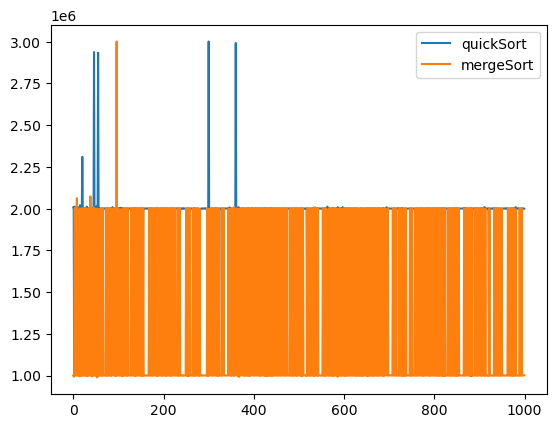

In [67]:
from matplotlib import pyplot
import pandas as pd

#graficar las dos listas
pyplot.plot(lista1,label = "quickSort")
pyplot.plot(lista2,label = "mergeSort")
pyplot.legend() # Colocar la leyenda

#graficar tabla de datos
tabladatos = pd.DataFrame(zip(lista1, lista2))
tabladatos.columns = ['T1(n)', 'T2(n)']
tabladatos

##los tiempos  en la tabla se presentan en  nanosegundos

In [69]:
from statistics import mean
print("run Time promedio de quick Sort: ",mean(lista1))
print("run time promedio de merge Sort: ",mean(lista2))

run Time promedio de quick Sort:  1936150.784
run time promedio de merge Sort:  1362157.824


4. Diferences:\
Como se sabe, la complejidad de ambos suele ser O(nlogn), pero en el peor caso de quickSort la complejidad puede llegar a O($n^2$). Esto se puede apreciar en la grafica, donde ambos algoritmos siguen un comportamiento similar con respecto a su runtime pero quicksort en ocasiones muestra picos mas altos, los cuales indican que en esas ocaciones se encontro con un peor caso (donde el pivote inicial se ubica en un extremo). Usando el valor del promedio de cada algoritmo podemos saber cual es mas eficiente o mejor con respecto al runtime, dejando a mergeSort como el mejor algoritmo. Es importante considerar que no siempre mergeSort sera la mejor opcion. Como se vio, ambos algoritmos poseen comportamiento similar aunque mergesort tiene una pequeña ventaja, por lo que si se habla de tiempo es mejor usar mergeSort, pero si se toma en cuenta la memoria usada, mergeSort debe crear una lista temporal del mismo tamaño que la original, por lo que quickSort se vuelve mejor en terminos de memoria

## Pregunta 4

**Implement factorials with recursion**

Recall that a factorial number is defined as:\
$k!= k x (k-1) x (k-2) x ... x 2 x 1$\
For example: $3! = 3 x 2 x 1 = 6$
1. Use recursion to implement the factorial
2. Run your code for numbers between 1 and 10000
3. Calculate the execution time and plot it.
4. What's the complexity?
5. Implement memoization to improve the performance of your code
6. Measure the runtime when you calculate the factorial for numbers between 1 and 10000.
7. What's the complexity of your code using memoization?
8. How does the first implementation and the one with memoization compare?